In [4]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 84.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 54.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempti

In [6]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [6]:
train_dir = '/kaggle/input/100-bird-species/train'
filepaths = []
labels = []
folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)


In [7]:
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)

In [8]:
train_df 

,filepaths,labels
0,/kaggle/input/100-bird-species/train/DALMATIAN...,DALMATIAN PELICAN
1,/kaggle/input/100-bird-species/train/DALMATIAN...,DALMATIAN PELICAN
2,/kaggle/input/100-bird-species/train/DALMATIAN...,DALMATIAN PELICAN
3,/kaggle/input/100-bird-species/train/DALMATIAN...,DALMATIAN PELICAN
4,/kaggle/input/100-bird-species/train/DALMATIAN...,DALMATIAN PELICAN
...,...,...
84630,/kaggle/input/100-bird-species/train/GOLDEN EA...,GOLDEN EAGLE
84631,/kaggle/input/100-bird-species/train/GOLDEN EA...,GOLDEN EAGLE
84632,/kaggle/input/100-bird-species/train/GOLDEN EA...,GOLDEN EAGLE
84633,/kaggle/input/100-bird-species/train/GOLDEN EA...,GOLDEN EAGLE


In [9]:
valid_dir = '/kaggle/input/100-bird-species/valid'
filepaths = []
labels = []
folds = os.listdir(valid_dir)
for fold in folds:
    foldpath = os.path.join(valid_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

In [10]:
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis=1)

In [11]:
valid_df

,filepaths,labels
0,/kaggle/input/100-bird-species/valid/DALMATIAN...,DALMATIAN PELICAN
1,/kaggle/input/100-bird-species/valid/DALMATIAN...,DALMATIAN PELICAN
2,/kaggle/input/100-bird-species/valid/DALMATIAN...,DALMATIAN PELICAN
3,/kaggle/input/100-bird-species/valid/DALMATIAN...,DALMATIAN PELICAN
4,/kaggle/input/100-bird-species/valid/DALMATIAN...,DALMATIAN PELICAN
...,...,...
2620,/kaggle/input/100-bird-species/valid/GOLDEN EA...,GOLDEN EAGLE
2621,/kaggle/input/100-bird-species/valid/GOLDEN EA...,GOLDEN EAGLE
2622,/kaggle/input/100-bird-species/valid/GOLDEN EA...,GOLDEN EAGLE
2623,/kaggle/input/100-bird-species/valid/GOLDEN EA...,GOLDEN EAGLE


In [12]:
test_dir = '/kaggle/input/100-bird-species/test'
filepaths = []
labels = []
folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

In [13]:
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis=1)

In [14]:
test_df

,filepaths,labels
0,/kaggle/input/100-bird-species/test/DALMATIAN ...,DALMATIAN PELICAN
1,/kaggle/input/100-bird-species/test/DALMATIAN ...,DALMATIAN PELICAN
2,/kaggle/input/100-bird-species/test/DALMATIAN ...,DALMATIAN PELICAN
3,/kaggle/input/100-bird-species/test/DALMATIAN ...,DALMATIAN PELICAN
4,/kaggle/input/100-bird-species/test/DALMATIAN ...,DALMATIAN PELICAN
...,...,...
2620,/kaggle/input/100-bird-species/test/GOLDEN EAG...,GOLDEN EAGLE
2621,/kaggle/input/100-bird-species/test/GOLDEN EAG...,GOLDEN EAGLE
2622,/kaggle/input/100-bird-species/test/GOLDEN EAG...,GOLDEN EAGLE
2623,/kaggle/input/100-bird-species/test/GOLDEN EAG...,GOLDEN EAGLE


In [15]:
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_gen = tr_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen = tr_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=True, batch_size=batch_size)

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.


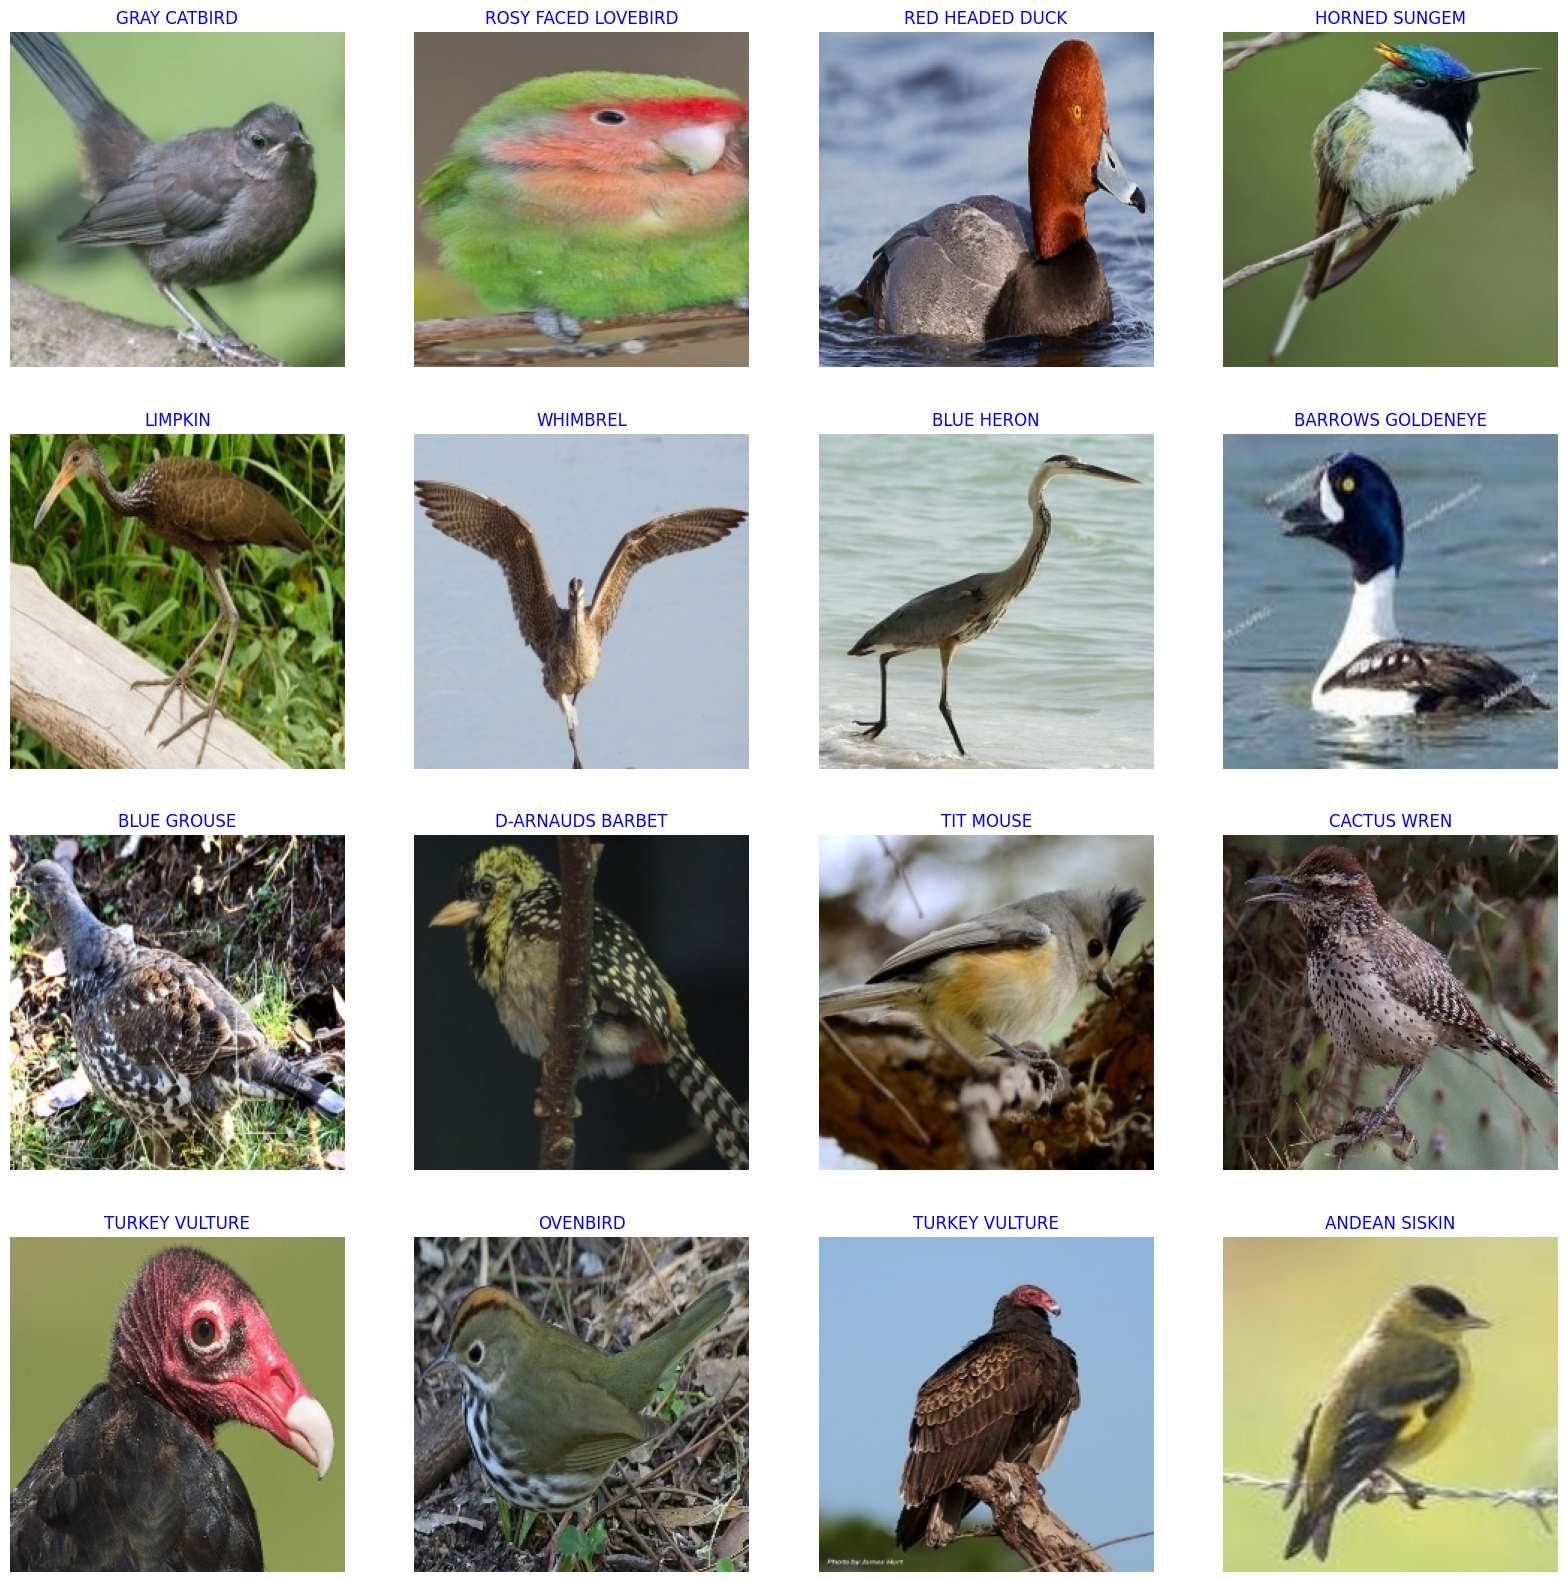

In [18]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()

In [22]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123), 
    Dense(class_count, activation='softmax')
])
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 525)               134925    
                                                                 
Total params: 4,517,552
Trainable params: 4,472,969
Non-trainable params: 44,583
_________________________________________

In [23]:
batch_size = 32
epochs = 10
history = model.fit(x=train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, validation_steps=None, shuffle=False)

Epoch 1/10
2645/2645 [==============================] - 847s 315ms/step - loss: 5.1014 - accuracy: 0.4996 - val_loss: 2.0774 - val_accuracy: 0.9139
Epoch 2/10
2645/2645 [==============================] - 585s 221ms/step - loss: 2.1309 - accuracy: 0.8574 - val_loss: 1.4217 - val_accuracy: 0.9440
Epoch 3/10
2645/2645 [==============================] - 585s 221ms/step - loss: 1.5312 - accuracy: 0.9173 - val_loss: 1.1426 - val_accuracy: 0.9585
Epoch 4/10
2645/2645 [==============================] - 585s 221ms/step - loss: 1.2219 - accuracy: 0.9436 - val_loss: 0.9653 - val_accuracy: 0.9630
Epoch 5/10
2645/2645 [==============================] - 584s 221ms/step - loss: 1.0218 - accuracy: 0.9588 - val_loss: 0.8701 - val_accuracy: 0.9665
Epoch 6/10
2645/2645 [==============================] - 585s 221ms/step - loss: 0.8794 - accuracy: 0.9687 - val_loss: 0.7758 - val_accuracy: 0.9684
Epoch 7/10
2645/2645 [==============================] - 582s 220ms/step - loss: 0.7752 - accuracy: 0.9754 - val_

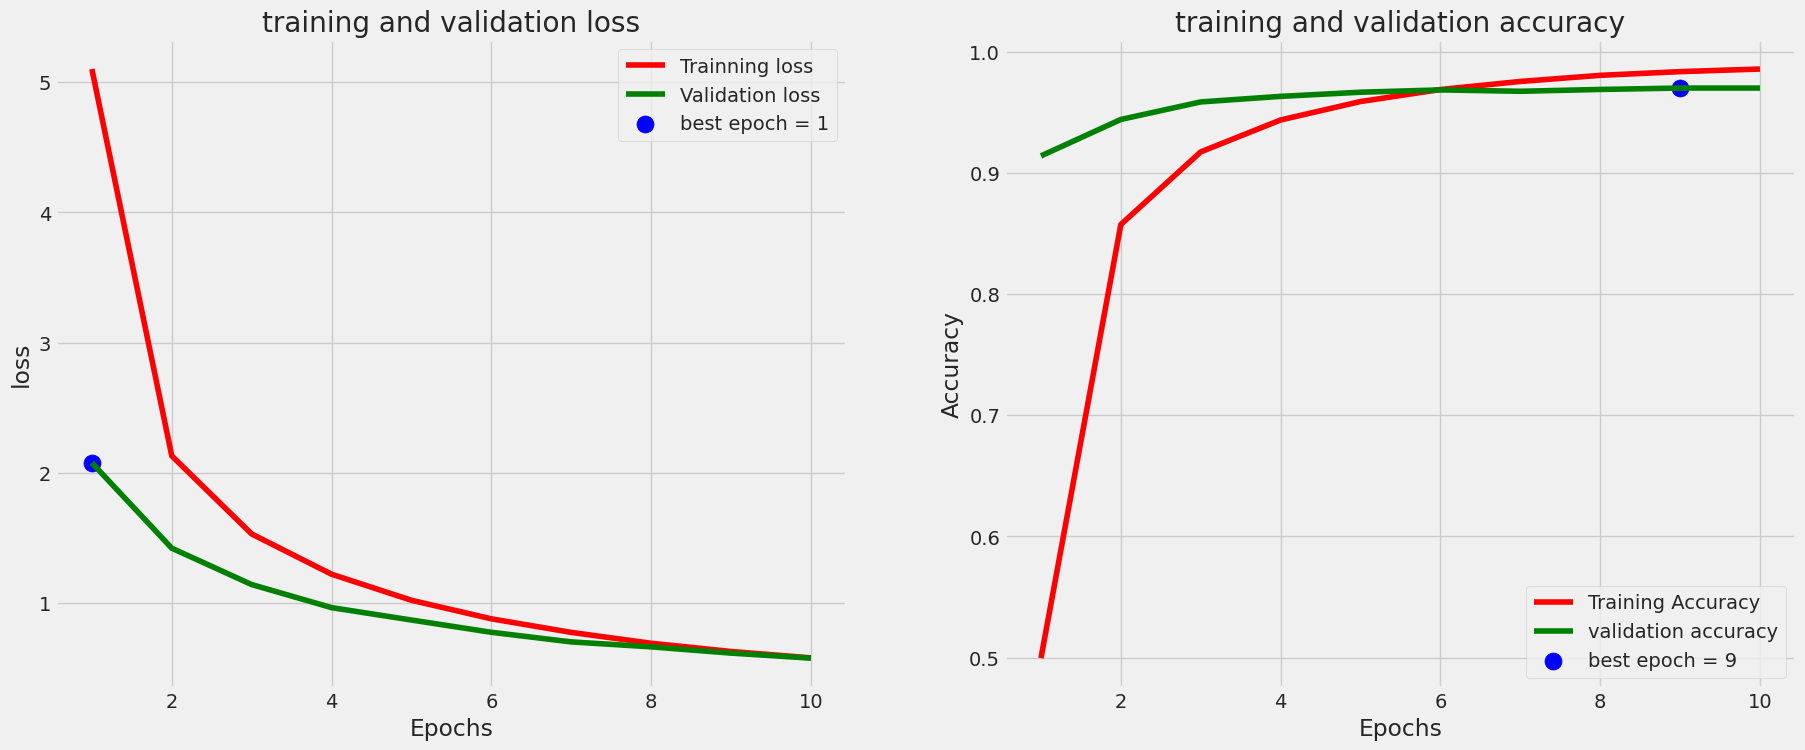

In [26]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_acc)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch = {str(index_loss + 1)}'
acc_label = f'best epoch = {str(index_acc+1)}'
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)
plt.plot(Epochs, tr_loss, 'r', label='Trainning loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss+1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='validation accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [28]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length +1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length//test_batch_size
train_score = model.evaluate(train_gen, steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

35/35 [==============================] - 9s 254ms/step - loss: 0.5179 - accuracy: 0.9830
Train Loss:  0.4813252091407776
Train Accuracy:  0.9946428537368774
--------------------
Validation Loss:  0.569523274898529
Validation Accuracy:  0.9696428775787354
--------------------
Test Loss:  0.5178689956665039
Test Accuracy:  0.9830357432365417


In [31]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [32]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

KeyboardInterrupt: 

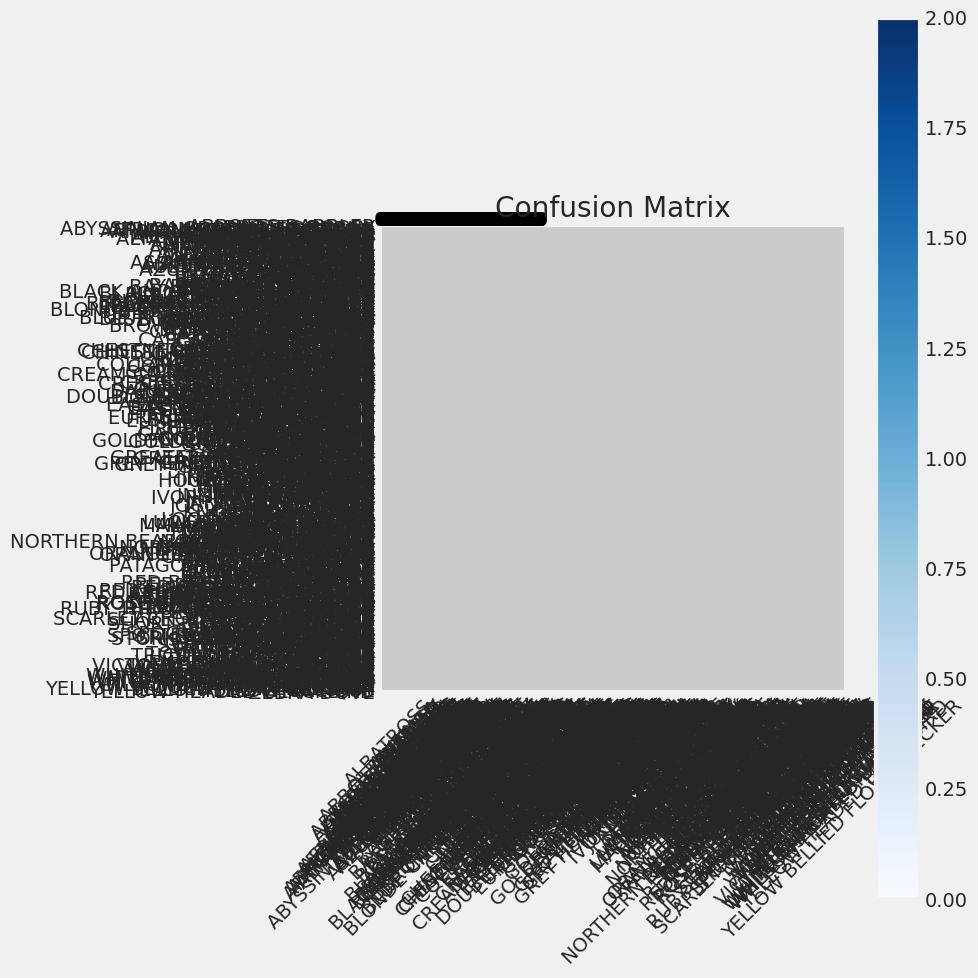

In [33]:
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [34]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.00      0.00      0.00         5
                ABBOTTS BOOBY       0.00      0.00      0.00         5
   ABYSSINIAN GROUND HORNBILL       0.00      0.00      0.00         5
        AFRICAN CROWNED CRANE       0.00      0.00      0.00         5
       AFRICAN EMERALD CUCKOO       0.00      0.00      0.00         5
            AFRICAN FIREFINCH       0.00      0.00      0.00         5
       AFRICAN OYSTER CATCHER       0.00      0.00      0.00         5
        AFRICAN PIED HORNBILL       0.00      0.00      0.00         5
          AFRICAN PYGMY GOOSE       0.00      0.00      0.00         5
                    ALBATROSS       0.00      0.00      0.00         5
               ALBERTS TOWHEE       0.00      0.00      0.00         5
         ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
                ALPINE CHOUGH       0.00      0.00      0.00         5
     

In [9]:
model.save('model.h5')

NameError: name 'model' is not defined

In [8]:
loaded_model = tf.keras.models.load_model('/kaggle/working/model.h5', compile=False)
loaded_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


OSError: No file or directory found at /kaggle/working/model.h5

In [2]:
from PIL import Image

In [7]:
image_path = '/kaggle/input/100-bird-species/test/BANANAQUIT/5.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

NameError: name 'loaded_model' is not defined